# Applied Statistics Assessment

In [1]:
# Random number generation.
import random

# Data handling.
import pandas as pd

# Numerical structures and applications.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Mathematical functions.
import math

In [2]:
# Hypothesis testing function.
def hypothesis_test_decision(p_value, alpha):
    """
    Compares the p-value from a statistical test with the significance level, alpha.
    Returns a decision indicating whether the null hypothesis should be rejected. 
    """
    # If the p-value is less than or equal to the significance level
    if p_value <= alpha:
        # reject the null hypothesis.
        return 'Reject the null hypothesis.'
    
    # Otherwise, fail to reject the null hypothesis.
    else:
        return 'Fail to reject the null hypothesis.'

In [3]:
# Set the plotting style.
sns.set_style("whitegrid")

## Introduction

This notebook contains the solutions to four assessment problems for the Applied Statistics module, which forms part of the Higher Diploma in Science in Data Analytics at Atlantic Technological University.

The problems focus on applying fundamental statistical concepts, including hypothesis testing, probability distributions, _t_-tests and analysis of variance (ANOVA), using Python and Jupyter Notebook.

The problems are:
- [Extending the Lady Tasting Tea](#problem-1-extending-the-lady-tasting-tea)
- [Normal Distribution](#problem-2-normal-distribution)
- [t-Tests](#problem-3-t-tests)
- [ANOVA](#problem-4-anova)

## Problem 1: Extending the Lady Tasting Tea

### __Brief__ 

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the _p_-value threshold compared to the original design.

### __Background__

The _Lady Tasting Tea_ is a famous statistical experiment devised by [Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) to investigate a woman's claim that she could distinguish whether the milk or tea was poured first into a cup of tea. For the non-statistician, this [Irish Times article](https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786) entitled "How a tea-tasting test led to a breakthrough in statistics" gives an easy to understand explanation of the lady tasting tea experiment.

In the original experiment, eight cups of tea were presented to the lady - four with milk first and four with tea first. They were identical in all other respects and were presented in a _random_ order. Fisher aimed to calculate the probability, _p_, that the lady was selecting the four milk first cups purely by chance.

[Probability](https://statisticsbyjim.com/probability/probability-fundamentals/), _p_ measures the likelihood of an event occurring, expressed as a value between 0 and 1, where 0 is impossible and 1 is certain. 

As part of this experiment, Fisher introduced the ``null hypothesis``, _H<sub>0</sub>_, and the ``alternative hypothesis``,  _H<sub>a</sub>_. The null hypothesis is the default position and is assumed to be true unless proven otherwise. The alternative hypothesis opposes the null hypothesis and assumes a relationship between the variables. As stated in this article, [Alternative Hypothesis: Definition, Types, and Examples](https://www.geeksforgeeks.org/maths/alternative-hypothesis-definition-types-and-examples/)  
>"The null and alternative hypotheses are exhaustive, meaning that together they cover every possible outcome. They are also mutually exclusive, meaning that only one can be true at a time."

For the original lady tasting tea experiment, the null hypothesis and the alternative hypothesis are:

>__Null Hypothesis _H<sub>0</sub>_:__
>
>* The lady has no special powers to tell the difference between cups of tea with milk first and cups of tea with tea first.
>* The lady is selecting four cups milk first cups from eight at random.
>
>__Alternative Hypothesis _H<sub>a</sub>_:__
>* The lady can tell the difference. 

At the outset of the experiment, Fisher also chose a ``significance level``, α of 0.05. As he states on page 13 of [The Design of Experiments](https://home.iitk.ac.in/~shalab/anova/DOE-RAF.pdf): 
>"It is open to the experimenter to be more or less exacting in respect of the smallness of the probability he would require before he would be willing to admit that his observations have demonstrated a positive result." 

StatisticsByJim.com defines the [Significance level](https://statisticsbyjim.com/glossary/significance-level/) as follows:
> The significance level, also known as alpha or α, is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant.

For example, a significance level of 0.05 has a 5% risk of concluding that a difference exists when there is no difference. Lower significance levels indicate that you require stronger evidence before you reject the null hypothesis. 

This can be summarised as:
* If __*p* ≤ α__, reject the null hypothesis.
* If __*p* > α__, fail to reject the null hypothesis.

Statistical significance indicates that the effect you observe in a sample is unlikely to be the product of chance if the null hypothesis were true.

![p-value less than significance level](img/p-value.png)

_Credit [gigacalculator.com](https://www.gigacalculator.com/articles/p-value-definition-and-interpretation-in-statistics/)_

``Randomisation`` in the order of the cups and the order in which the cups were presented to the lady is a key component of the experiment. In [The Historical and Statistical Significance of the Lady Tasting Tea Experiment](https://jyyna.co.uk/lady-tasting-tea/), the author notes that:

>"The randomisation of the order of cups was crucial to prevent any bias or pattern recognition that could influence the results." 

Randomisation eliminates selection bias, ensuring that each cup has an equal chance of being selected and facilitates statistical analysis as statistical tests assume randomness. As an aside, the author replicated the experiment with his friends - none of them could match the lady's accuracy!

[Combinatorial maths](https://www.geeksforgeeks.org/engineering-mathematics/combinatorics/), a branch of mathematics that focuses on counting and arranging things, is used to calculate the probability of selecting the four milk first cups from eight cups at random. The [class lecture notes by Ian McLoughlin](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb) provides a detailed explanation of how to perform this calculation with Python.

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

Where:
* ${n}$ is the total number of cups 
* ${k}$ is the number of cups with milk first. 

The probability, _p_, of correctly identifying at random all four milk first cups, where ${n}$ is 8 and ${k}$ is 4, is 1-in-70. 

$$p = \frac{1}{70} \approx 0.014$$

Since this _p_-value (0.014) is below the significance level (0.05), we reject the null hypothesis. Because she correctly identified all four cups, the evidence supports the conclusion that she can distinguish whether milk or tea was poured first.

### __Solution__

Solving this problem involves the following steps:
* Define the null hypothesis, the alternative hypothesis, and the significance level.
* Set the number of simulations.
* Set up a counter to track the number of successful outcomes and repeat the following:
  * Create twelve cup labels.
  * Shuffle the labels.
  * Select four cups that are milk first.
  * Select the guess as to which cups are milk first.
  * Compare results and record it as a success if the milk first array matches the guess array. 
* Calculate the probability and compare the value with the significance level.

The problem requires NumPy to simulate the experiment. 

* __Define the null hypothesis, the alternative hypothesis, and the significance level.__
  
   >__Null Hypothesis _H<sub>0</sub>_:__
   >* The lady has no special powers to tell the difference between cups of tea with milk first and cups of tea with tea first.
   >* The lady is selecting the four cups from twelve at random.
   
   >__Alternative Hypothesis _H<sub>a</sub>_:__
   >* The lady can tell the difference. 

   >__Significance level, α:__ 0.05

In [4]:
# Set the significance level, alpha.
alpha = 0.05

* __Set the number of times to simulate the experiment.__ 
   
   Repetition is important because running the experiment many times reduces the effect of randomness and gives a more stable estimate of the true probability. By repeating the simulation 10,000,000 times, the results become far more reliable and closely reflect the underlying theoretical value.

In [5]:
# Total number of simulations.
num_simulations = 10_000_000

* __Set up a counter to track the number of successful outcomes.__ 

In [6]:
# Count the number of times the guess matches the milk first selection.
success = 0

The following steps will be repeated for the number of simulation runs. 

* __Create cup labels:__
  
  Set up a NumPy array with 12 labels from 0 to 11 inclusive with ``numpy.arange``. 
  
  The numpy.arange function (see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)) returns an array of evenly spaced values within a given interval.  
  
  This array will represent the labels on the twelve cups. The stop value is excluded from the array. 
 
   ```python
   numpy.arange([start, ]stop, [step, ]dtype=None)
   ```

In [7]:
# Generate an array of 12 values from 0 to 11 (inclusive). 
example = np.arange(12)
example

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

* __Shuffle the labels:__ 

   The brief states that the arrays must be shuffled many times. [Numpy.random.shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html) is used to randomly shuffle the labels. This function modifies the array in place, and each run may produce a different permutation. 

In [8]:
# Shuffle an array.
np.random.shuffle(example)
example

array([ 7, 11,  8,  2,  4,  0,  1,  5,  9, 10,  6,  3])

* __Select cups for milk first:__
   
  Choose four labels from the cups array to be milk in first. 

   To choose four cups from the array, the function ``numpy.random.choice`` was used. The [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) states that ``numpy.random.choice`` generates a random sample from a given 1-D array.
   
   It has three parameters:

   ```python 
   numpy.random.choice(a, size=None, replace=True, p=None)
   ```
    
   * __a:__ the array to sample from

   * __size:__ the number of elements to select

   * __replace:__ either True or False. 
    
   If ``replace = True``, the function samples with replacement, and the same value can be returned more than once. This is the default.
   
   For this experiment, ``replace = False`` as we want to sample without replacement. Each value can only appear once. Once a cup is chosen, it is not replaced in the array. 

In [9]:
# Draw 3 random values from the range 0 to 4 inclusive. 
np.random.choice(5, 3, replace=True)

array([0, 3, 3])

In [10]:
#  Draw 3 random values from the range 0 to 4 inclusive, sampling without replacement.
np.random.choice(5, 3, replace = False)

array([2, 4, 3])

[Np.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) returns a sorted copy of an array. By sorting both arrays, we simplify the comparison step between the guess and the milk first arrays. The position of the element matters when comparing arrays.

In [11]:
# Values are chosen, and the array is sorted in place.
np.sort(np.random.choice(5, 3, replace = False))

array([0, 1, 2])

* __Select the guess:__
  
  In the next step, four cups are randomly selected to represent the guess of which four cups are milk first. The functions ``numpy.random.choice`` and ``numpy.sort`` will randomly select and sort four labels from the cups array. 

* __Compare results:__ 
 
    Compare the milk first array with the guess array using ``numpy.array_equal``. Both arrays were sorted in the previous steps as [numpy.array_equal](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html) compares two arrays element-wise. 

    It returns ``True`` if the two arrays have the same shape and elements. 

    ```python
    numpy.array_equal(a1, a2, equal_nan=False)[source] where a1 and a2 are the arrays
    ```

    Other methods to compare arrays are discussed on [StackOverflow](https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise). Suggested methods included the functions ``numpy.all`` and ``numpy.equiv``.

In [12]:
# Two arrays with the same elements but in different orders.
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 5, 4]

# Compare the arrays element-wise.
# Returns False because the order of the elements differs.
np.array_equal(a1, a2)

False

In [13]:
# Two arrays with the same elements and positions.
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 4, 5]

# Compare the arrays element-wise.
# Returns True as the elements and positions match.
np.array_equal(a1, a2)

True

* __Record success:__ 
  
  If the arrays match, record the result as success. A success occurs when the four guessed cups match the four milk first cups. 

* __Repeat the process__.

    Repeat the above process of creating an array of 12 cups, shuffle the array, select the four milk first cups, guess which cups are milk first, and compare the guess array with the milk first array. 

In [14]:
# Run the simulation multiple times to calculate the frequency of successful outcomes.
for _ in np.arange(num_simulations):

    # Create an array representing 12 cups labeled 0-11 inclusive.
    cups = np.arange(0, 12)

    # Randomly shuffle the cups.
    np.random.shuffle(cups)

    # Randomly choose 4 cups that have milk added first. Sample without replacement.
    # Sort the array in ascending order.
    milk_first_cups = np.sort(np.random.choice(cups, size = 4, replace = False))

    # Randomly guess which cups have milk added first. Sample without replacement.
    # Sort the array in ascending order.
    guess = np.sort(np.random.choice(cups, size = 4, replace= False))
    
    # If the guess matches the milk selection, count it as a success.
    if np.array_equal(milk_first_cups, guess):
        success += 1

In [15]:
# Show the number of successful outcomes. 
f'There were {success} successful outcomes from {num_simulations} simulations.'

'There were 20005 successful outcomes from 10000000 simulations.'

* __Report and interpret the estimated probability.__
 
   Calculate the probability with the following formula:
    $$p = \frac{success}{no.\;of\;simulations}$$

In [16]:
# Calculate the probability of success.
p_value = success/num_simulations

# Print the p-value.
print(f'The probability of the lady correctly selecting the four milk first cups at random from twelve cups is: {p_value}.')

The probability of the lady correctly selecting the four milk first cups at random from twelve cups is: 0.0020005.


In [17]:
# Determine whether to reject or fail to reject the null hypothesis.
hypothesis_test_decision(p_value, alpha)

'Reject the null hypothesis.'

The probability of the lady correctly selecting the four milk first cups from twelve by random guessing is 0.002, corresponding to a 2-in-1000 chance. 

This is substantially smaller than the probability of 0.014 for the original eight-cup experiment. 

Because the probability for both experiments are below the significance level (α = 0.05), there is sufficient evidence to reject the null hypothesis if the lady correctly identifies the four milk first cups. 

The 12-cup simulation, with its lower probability (_p_ = 0.002), provides an even stronger case against the null hypothesis than the 8-cup experiment (_p_ = 0.014). It is seven times less likely to correctly identify the correct four cups when there are twelve cups than when there are eight cups. 

If the lady selects the four milk first cups, we can conclude that there is strong evidence that she can distinguish between the cups of tea.

* __Consider extending or relaxing the _p_-value threshold compared to the original design. Discuss.__
  
The final part of this problem is to consider extending or relaxing the _p_-value threshold compared to the original design. Choosing the significance level before the experiment is a fundamental part of a statistical analysis, and I would neither extend nor relax the _p_-value threshold based on the results of the experiment. The question of whether it is ever good to increase the significance level was posed on [StackExchange](https://stats.stackexchange.com/questions/24203/is-it-ever-good-to-increase-significance-level):

> "Suppose you are using $\alpha = 0.01$ as the significance level. If you are not getting significant results, is it better to increase the significance level to $\alpha = 0.05$?" 

One respondent provided a useful analogy: 

> A farmer had lots of targets painted on the side of his barn with bullet holes perfectly centred in the bullseye. As he explained, "I shoot first and paint the target afterwards." – 
Dilip Sarwate Commented Mar 6, 2012 at 20:33

This captures why adjusting the significance level to decide what is statistically significant after seeing the data is a poor practice. The practice of manipulating data or statistical analyses to find statistically significant results is called [_p_-hacking](https://statisticsbyjim.com/hypothesis-testing/p-hacking/) or [data dredging](https://en.wikipedia.org/wiki/Data_dredging).

Could I have given more consideration to extending or relaxing the threshold level compared to the original experiment at the start of the modified experiment? Possibly. The most commonly used significance levels are 0.05 and 0.01. The choice of significance level is influenced by the consequences of false positive or false negative results. This article, [Understanding Significance Levels](https://www.statsig.com/blog/understanding-significance-levels-a-key-to-accurate-data-analysis), explains that in fields like medicine, false negatives can have serious consequences, so lower significance levels are chosen. For this problem, there are no serious consequences of a false negative or a false positive, so I see no reason to either extend or relax the significance level. 

***

## Problem 2: Normal Distribution

### __Brief__

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof = 1 (sample SD) and with ddof = 0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### __Background__

__Normal Distribution__

The ``normal distribution`` follows a symmetrical, bell-shaped curve that measures the probability of seeing a particular value. 

The apex of the curve is the ``mean``, $\mu$, of the values, and the ``standard deviation``, $\sigma$, measures the spread of the values. The total area under the curve is exactly 1. 

It is a good model for predicting and understanding real-world data as it describes the distribution of values for many real-world phenomena. This YouTube video by Socratica, [Normal distributions explained - with real world examples](https://www.YouTube.com/watch?v=xlxaa9YhT6A), is informative and easy to understand. 

A ``standard normal distribution`` is a special type of the normal distribution with a mean, $\mu$ = 0, and a standard deviation, $\sigma$ = 1. 

This diagram from geeksforgeeks.org illustrates the difference between a normal distribution and a standard normal distribution.

![Plot of normal distribution and standard normal distribution](img/normal_distribution2.png)

_Credit https://www.geeksforgeeks.org/maths/standard-normal-distribution/_

Many statistical tests rely on the values being transformed into or assumed to follow the standard normal distribution. Transforming values into a standard normal distribution, in a process called standardisation, makes it easier to compare values from different distributions. This YouTube video, [Z-Scores, Standardisation, and the Standard Normal Distribution (5.3)](https://www.YouTube.com/watch?v=2tuBREK_mgE) explains how standardisation is performed with three examples. 

__Mean__

The mean is the average of a set of numbers.

$$
\mu = \frac{\sum\limits_{i=1}^{N} x_i}{n}
$$

Where:

- $\mu$ = mean
- $x_i$ = each observed value
- $n$ = the number of observations

The NumPy function [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) calculates the mean along a specified axis. If no axis is stated, the default is to calculate the mean of the flattened array. 

In [18]:
# List of numbers. 
data = [1, 2, 3, 4, 5]

# Calculate the mean.
mean = np.mean(data)

# Show.
print(mean)

3.0


__Standard Deviation__

Standard deviation measures how spread out the data points are. Wikipedia defines [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) as:

> A measure of the amount of variation of the values of a variable about its mean.

* A small standard deviation indicates that the values are very close to the mean. 

* A large standard deviation indicates that the values have a wide spread about the mean.

In a normal distribution, the [empirical rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), also known as the 68-95-99.7 rule, tells us how data is spread around the mean:
* About 68% of observations will fall within the first standard deviation ($\mu ± \sigma$)  of the mean.
* About 95% within the first two standard deviations ($\mu ± 2\sigma$).
* About 99.7% within the first three standard deviations ($\mu ± 3\sigma$).


![Diagram depicting the empirical rule](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2021/08/empirical_rule_graph2.png?w=572&ssl=1)

_Credit statisticsbyjim.com_

__Population vs Sample Standard Deviation__

The calculation of the standard deviation depends on whether the data represents the entire population or a sample of the population. 

The ``population standard deviation`` is used when the values are for the entire population. For example, if we measured the height of every person in a country, we would use the formula for the population standard deviation. As we can only measure the height of a portion of the population, the ``sample standard deviation`` is used. The sample standard deviation gives an estimate of the population standard deviation. This page on [Standard Deviation on laerd.com](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) contains additional examples on the use of population and sample standard deviation.

Another statistic commonly used when examining a distribution is the variance, $\sigma^2$. The standard deviation is the square root of the variance. Variance is based on the square differences between each data point and the mean. Standard deviation is easier to explain as it has the same unit as the mean.

### __Solution__

To solve this problem:
* Generate 100,000 samples of size 10 from the standard normal distribution.
* Calculate the population standard deviation for each row of the sample.
* Calculate the sample standard deviation for each row of the sample.
* Plot, on the same axes, a histogram of the the population standard deviation and the sample standard deviation .
* Discuss the differences between the histograms.
* Explain how you expect these differences to change if the sample size is increased.

* __Generate 100,000 samples of size 10 from the standard normal distribution.__

NumPy's [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal) generates samples from a normal distribution. 

```python
random.normal(loc=0.0, scale=1.0, size=None)
```

Where:
- loc = mean
- scale = standard deviation
- size = output shape

The ``size`` parameter can be either an integer or a tuple. 

* If it is an integer, numpy returns a 1-dimensional array of that many samples. 

* If it is a tuple, NumPy returns an $N$-dimensional array. 
    * The first value in the tuple is the number of rows (or separate samples).
    * The second value is the number of samples in each row. 

[How to get normally distributed random numbers with NumPy ](https://realpython.com/numpy-random-normal/) discusses how to generate random numbers with random.normal and plot histograms of the values.

For example, the code below generates 2 sets of 10 normally distributed random samples. 

In [19]:
# Generate 2 sets of size 10 of standard normally distributed values.
example = np.random.normal(loc=0.0, scale=1.0, size=(2, 10))
example

array([[ 0.79392667, -0.75238078,  0.91399298,  0.94550223, -1.34551613,
        -0.45492612,  1.77559734,  0.69522691,  0.02203975, -0.45397877],
       [-0.34600332, -0.28077461,  0.57576682,  1.70058601, -1.4456358 ,
         0.31683928,  0.02965684, -1.31973715,  0.44974093,  0.19806222]])

In [20]:
# Generate 100,000 standard normal distributed samples of size 10.
samples = np.random.normal(loc=0.0, scale=1.0, size=(100000, 10))
samples

array([[-1.26805978,  0.56528238, -0.6921615 , ..., -0.73609593,
        -1.29874313,  0.4611868 ],
       [ 1.40190698, -1.65567943,  0.35005591, ..., -0.19969081,
         0.77024699, -0.25303729],
       [ 0.70202396,  0.27286122,  0.27654249, ...,  1.21555509,
        -0.26553912, -0.14913116],
       ...,
       [ 1.13307041,  0.3409589 ,  0.16248772, ..., -1.41794958,
         0.08731742, -0.60987556],
       [-0.07610194, -0.20425236,  0.23682331, ...,  0.70652215,
        -0.40409083,  0.77054533],
       [-0.01286904,  0.0639303 , -0.0420283 , ...,  1.1193111 ,
         2.8942918 ,  0.36429881]], shape=(100000, 10))

* __Calculate the population and sample standard deviation.__

To calculate the standard deviation along a specified axis [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) is used. 

```python
numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>, mean=<no value>, correction=<no value>)
```

Two parameters, ``axis`` and ``ddof``, are necessary to complete this task.

_Axis:_

The standard deviation for the flattened array is calculated by default if no axis is specified.

* If ``axis = 1``, the standard deviation for each row of the array is returned.
* If ``axis = 0``, the standard deviation for each column is returned. 

For this problem, ``axis = 1`` is required to calculate the standard deviation for each row of samples.

_ddof:_

Ddof stands for Delta Degrees of Freedom. These are the number of values that can vary in an analysis. [StatisticsByJim.org](https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/) has an intuitive explanation of degrees of freedom. He explains it with an example - imagine you know the mean of 10 numbers but you are only given 9 values. For this example, ddof is 9 as there is only one possible value for the 10th number.

$$ddof = N- P$$

Where:
* $N$ = sample size
* $P$ = number of parameters

When ``ddof = 0``, the population standard deviation is calculated as we know all the values in the population. This is the default position. 

The sample standard deviation is calculated when ``ddof = 1``.

The [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) on numpy.std explains the calculation. The divisor used in the calculation is $N - ddof$, where $N$ is the number of elements. When ``ddof = 1``, the divisor is Bessel's correction, $N - 1$ and the sample standard deviation is calculated. 

```python
N = len(a)
d2 = abs(a - mean)**2  # abs is for complex `a`
var = d2.sum() / (N - ddof)  # note use of `ddof`
std = var**0.5
```

In [21]:
# Calculate the population standard deviation. 
example = np.std(data, ddof = 0)
print(example)

1.4142135623730951


In [22]:
# Calculate the sample standard deviation. 
example = np.std(data, ddof = 1)
print(example)

1.5811388300841898


As we want the population (``ddof = 0``) and sample (``ddof = 1``) standard deviations for each row, ``axis = 1``.

In [23]:
# Calculate the population standard deviation.
population_std_dev = np.std(samples, ddof = 0, axis = 1)

# Show.
population_std_dev

array([0.9847857 , 0.8471846 , 0.59078151, ..., 1.06206791, 0.4926582 ,
       1.24557426], shape=(100000,))

In [24]:
# Calculate the sample standard deviation.
sample_std_dev = np.std(samples, ddof = 1, axis = 1)

# Show.
sample_std_dev

array([1.03805527, 0.89301097, 0.62273839, ..., 1.11951787, 0.51930734,
       1.31295056], shape=(100000,))

* __Plot histograms of both sets of values on the same axes with transparency.__

``Histograms`` are used for plotting continuous data. A good histogram can indicate if the data has a normal distribution. 

Matplotlib's [plt.hist](https://matplotlib.org/stable/gallery/statistics/hist.html) and seaborn's sns.hisplot function (see [official documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)) plot histograms. Seaborn is a plotting library built on top of matplotlib. Datacamp has a nice tutorial on making [histograms with seaborn](https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram).

```python
seaborn.histplot(data = None, x = None, y = None, bins = 'auto', alpha = None, kde = False)
```

For this problem, seaborn.hisplot was used to create the histograms. Seaborn.histplot has the kde parameter, which creates a kernel density plot over the histogram. KDE provides a smooth estimate of the data distribution and can be useful for identifying patterns. Matplotlib.hist does not have an equivalent parameter. 

_Alpha_:

The alpha parameter ([see matplotlib documentation](https://matplotlib.org/stable/gallery/color/set_alpha.html)) controls the transparency level of a plot. Alpha ranges from 0 (completely transparent) to 1 (fully opaque). 

_Bins_:

Bins in a histogram are the intervals into which a dataset is divided. The number of bins influences the shape of the plot. If the number of bins is not specified, seaborn calculates the number of bins. For this plot, too many bins were generated with the default setting, so ``np.linspace`` was used to specify the number of bins. As the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) states, np.linspace returns evenly spaced numbers over a specified interval.

```python
numpy.linspace(start, stop, num= 50)
```

In [25]:
# Generate an array of 33 values from 0 to 2.0 inclusive.
np.linspace(0.0, 2.0, 33)

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    ])

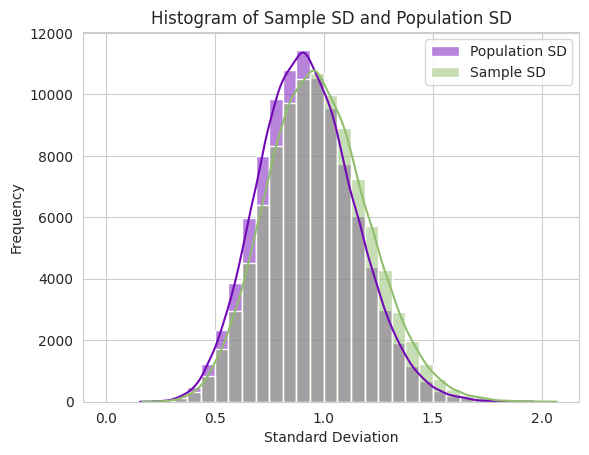

In [26]:
# Create a plot.
fig, ax = plt.subplots()

# Histogram of the population standard deviations.
sns.histplot(x = population_std_dev, kde=True, bins=np.linspace(0.0, 2.0, 33), alpha = 0.5, label = 'Population SD', color="#7209B7")

# Histogram of the sample standard deviations.
sns.histplot(x = sample_std_dev, kde=True, bins=np.linspace(0.0, 2.0, 33), alpha = 0.5, label = 'Sample SD', color="#90BE6D")

# Title.
plt.title('Histogram of Sample SD and Population SD')

#  Label the x- and y-axis.
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')

#  Display the legend.
ax.legend()

# Show.
plt.show()

* __Describe the differences.__

It is immediately obvious that both plots have a normal distribution - the KDE plot helps with the visualisation.  

The apex of the plot is at the mean, $\mu$. We can see from the plot that the mean of the population standard deviation is smaller than the mean of the sample standard deviation. This can be confirmed with np.mean. 

In [27]:
# Mean of the population standard deviations.
np.mean(population_std_dev)

np.float64(0.9235889861257457)

In [28]:
# Mean of the sample standard deviations.
np.mean(sample_std_dev)

np.float64(0.9735482726676695)

As expected, the mean of the population standard deviations, $\mu = 0.92$, is smaller than the mean of the sample standard deviations, $\mu = 0.97$. To explain this difference, we need to compare the formulas to calculate the population standard deviation and the sample standard deviation. 

__Population Standard Deviation__

$$\sigma = \sqrt\frac{\sum\limits_{i=1}^{N}(x_i - \mu)^2}{N}$$

Where:

- $\sigma$ = population standard deviation
- $x_i$ = each data point
- $\mu$ = population mean
- $N$ = total number of data points

__Sample Standard Deviation__

$$s = \sqrt\frac{\sum\limits_{i=1}^{N}(x_i - \overline{x})^2}{N - 1}$$

Where:

- $s$ = sample standard deviation
- $x_i$ = each data point
- $\overline{x}$ = sample mean
- $N$ = total number of data points

* Sample standard deviation is used when the values are for a sample of a population. 

* The sample standard deviation gives an estimate of the population standard deviation. 

The numerator for both equations subtracts either the population mean or the sample mean from a data point. 

The sample mean, $\overline{x}$, tends to be smaller than the population mean, $\mu$, as it is calculated from sample data and is therefore closer to the sample points than the true population mean $\sigma$. For the sample standard deviation, if we divide by $N$ the resulting estimate of the population mean would be consistently too small. To account for this, the formula for sample standard deviation uses a denominator of ${N - 1}$. This adjustment is called Bessel's correction. Its purpose, as stated in this [Reddit article](https://www.reddit.com/r/askscience/comments/km51c/what_exactly_does_bessels_correction_do_when/), is to provide an unbiased estimate of the population variance. 

This YouTube video, [Why dividing by n underestimates the variance?](https://www.youtube.com/watch?v=sHRBg6BhKjI) explains why Bessel's correction is needed.

In summary, dividing by ${N - 1}$ compensates for the fact that we calculate differences from the sample mean rather than the population mean. The resulting estimated population standard deviation calculated with sample values would be consistently underestimated if the divisor were $N$.

* __Explain how you expect these differences to change if the sample size is increased.__

For this problem, 100,000 samples of size 10 were generated. If the sample size were increased, the sample standard deviation would be closer to the population standard deviation.

The formula for the sample standard deviation divides by $N-1$, Bessel's correction. This discussion, Intuitive explanation for dividing by $N-1$ when calculating standard deviation? on [stackexchange.com](https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation/3934#3934 ) explains the correction effect of $N-1$. The factor $N-1$ has a larger correctional effect when $N$ is small. As $N$ becomes larger, the sample mean is likely to be a good estimator of the population mean. 

As the sample size increases, the sample mean, $\overline{x}$, gets closer to the true population mean, $\mu$. When the mean is estimated more accurately, the deviations from the mean are computed more accurately, and the sample standard deviation is a better approximation of the population standard deviation.

I would expect that if the sample size were increased, the histogram of the sample standard deviations would overlap more with the plot of the population standard deviations.

***

## Problem 3: t-Tests

### __Brief__

A Type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference _d_ = 0, 0.1, 0.2, …, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean _d_ and standard deviation 1.
2. Run an independent samples _t_-test on the two samples, rejecting the null hypothesis if the _p_-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
   
Plot this proportion against _d_, and explain how the Type II error rate changes as the difference in means increases.

### __Background__

__Type II Error__

A [Type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors), or a false negative, occurs when a test fails to reject the null hypothesis even though it is false. A Type II error incorrectly concludes that no effect or difference exists. The probability of making a Type II error is denoted by $\beta$. 

The ``power`` of a test is $1 -\beta$, which is the probability of correctly rejecting the null hypothesis when there is a true effect. Power as explained in this [article](https://apcentral.collegeboard.org/courses/ap-statistics/classroom-resources/power-in-tests-of-significance), is the probability of avoiding a Type II error.

An example of a false negative occurs when a patient has a disease, but tests incorrectly report that the patient does not. 

[Investopedia.com](https://www.investopedia.com/terms/t/type-ii-error.asp) explains that several factors influence the rate of Type II errors, including sample size, the true population size, and the chosen alpha level. Creating a more stringent criterion for rejecting a null hypothesis could reduce the number of Type II errors but this often increases the number of Type I errors, or false positives. 

__*t*-test__

A [_t_-test](https://en.wikipedia.org/wiki/Student%27s_t-test), also known as the Student's _t_-test, is a statistical test used to determine if there is a significant difference between the means of two groups. 

T-tests assume that the data is normally distributed, and a _p_-value is calculated. 

There are three types of t-tests:

1. One-sample _t_-test.

    Compares the mean of a single sample to a known or hypothesised value.

2. Independent samples _t_-test.
   
    Compares the means of two separate, independent groups.
3. Paired samples _t_-test.
   
    Compare the means of the same group at different times, e.g. before and after a medical intervention.

A table on [jmp.com](https://www.jmp.com/en/statistics-knowledge-portal/t-test) summarises the different types of _t_-tests and provides guidance on selecting the correct test. 

A _t_-test returns a test statistic, _t_, from the sample data, which is used to calculate a probability value, _p_-value. As in Problem 1, the _p_-value is compared with the pre-specified significance level, $\alpha$, to determine whether the result is statistically significant.

A _t_-table or statistical software can be used to find the _p_-value based on your _t_-statistic and degrees of freedom. 

In general, a high _t_-statistic corresponds to a low _p_-value. 

### __Solution__

The null hypothesis for an ``independent t-test``, as defined by [Laerd Statistics](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php), is:

__Null hypothesis:__ The population means for the two independent populations are equal.

$$H_0: \mu_1 = \mu_2$$

__Alternative hypothesis:__ The means for the two populations are not equal.

$$H_0: \mu_1 \ne \mu_2$$


The __significance level__, $\alpha$, for this problem:

$$\alpha = 0.05$$

For this problem, we are investigating whether the Type II error rate changes as the difference in means increases. 

__Demonstration of an Independent _t_-Test.__

In [29]:
# Set significance level.
alpha = 0.05

1. Generate samples.

In problem 2, I demonstrated how to create a random sample with a normal distribution with ``numpy.random.normal``. This method will be used to generate samples with a standard normal distribution and a normal distribution. 

In [30]:
# Standard normal distribution.
standard_normal_sample = np.random.normal(0, 1, 100)

In [31]:
# Normal distribution with mean = 0.9.
demo_sample = np.random.normal(0.9, 1, 100)

2. Carry out an independent _t_-test.

SciPy (Scientific Python) is a scientific computation library that uses NumPy underneath. The [w3schools](https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php) tutorial on significance tests helps understand this problem. 

To run an independent _t_-test, [scipy.stats.ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) from the SciPy library is used. 

```python
ttest_ind(a, b, axis = 0)
```
Where:
a, b: arrays with the same shape.

``Stats.ttest_ind`` returns an object with the _t_-statistic, _p_-value and the df (the degrees of freedom used to calculate the _t_-statistic). 

In [32]:
# Perform an independent t-test.
result = stats.ttest_ind(standard_normal_sample, demo_sample)

# Print the result.
result

TtestResult(statistic=np.float64(-7.565960375945472), pvalue=np.float64(1.4182566750453216e-12), df=np.float64(198.0))

In [33]:
# Extract p-value from the result.
p_value = result[1]
print(p_value)

1.4182566750453216e-12


3. Compare the _p_-value with the significance level, alpha. 

In [34]:
# Determine whether to reject or fail to reject the null hypothesis.
hypothesis_test_decision(p_value, alpha)

'Reject the null hypothesis.'

For this demonstration of the independent _t_-test, we reject the null hypothesis as _p_-value is less than alpha. 

__The Experiment.__

* __Set the number of times to repeat the simulation.__

The brief states that the experiment must be repeated 1000 times. 

In [35]:
# Number of times to repeat the simulation.
n_simulations = 1000

* __Create a list of d values.__

The simulation must be performed for each mean, _d_ = 0.0, 0.1, 0.2, …, 1.0.

In [36]:
# List of 10 values ranging from 0.0 to 1.0.
d_values = np.arange(0, 1.1, 0.1)
d_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

* __Calculate the non-rejection rate for each d value.__

The process to solve this problem can be summarised as follows:

1. Generate a control sample with a standard normal distribution (mean = 0, SD = 1).
2. Generate a treatment sample with a normal distribution with a mean = _d_ and SD = 1. 
3. Perform an independent _t_-test and calculate the _p_-value using ``stats.ttest_ind``. 
4. If the _p_-value > 0.05 (the significance level), fail to reject the null hypothesis.
5. Repeat steps 1-4 for 1000 simulations and count the number of times the null hypothesis is not rejected. 
6. Calculate the non-rejection rate (failures to reject / total simulations) for that value of _d_.
7. Repeat this entire process for each value of _d_ in the range from 0.0 to 1.0.

In [ ]:
# Instantiate a list to track the non-rejection rate for each mean value.
type_ii_rates = []

# For each mean, d, in the list of d_values repeat the following:
for d in d_values:

    # Track the number of times the null hypothesis is not rejected.
    failures_to_reject = 0

    for _ in np.arange(n_simulations):

        # Generate a normal standard distribution.
        control_sample = np.random.normal(loc = 0.0, scale = 1.0, size =100)

        # Generate a normal distribution with mean, d.
        treatment_sample = np.random.normal(loc = d, scale= 1.0, size = 100)

        # Perform t-test.
        _, p_value = stats.ttest_ind(control_sample, treatment_sample)
        
        # If p_value >= alpha, count as fail to reject.
        if p_value >= alpha:
            failures_to_reject += 1
    
    # Calculate the non-rejection rate after 1000 simulations.
    non_rejection_rate = failures_to_reject/n_simulations

    # Append to the non_rejection_rate list.
    type_ii_rates.append(non_rejection_rate)

In [38]:
# Display the results.
type_ii_rates

[0.945, 0.894, 0.725, 0.42, 0.231, 0.06, 0.014, 0.0, 0.0, 0.0, 0.0]

* __Plot the proportion against *d*__

Transforming to a dataframe is not strictly necessary to create the plot, but it simplifies extracting data from the plot. 

In [39]:
# Transform to a dataframe. 
df = pd.DataFrame({'d': d_values, 'type_ii_rates': type_ii_rates})
df

,d,type_ii_rates
0,0.0,0.945
1,0.1,0.894
2,0.2,0.725
3,0.3,0.420
4,0.4,0.231
5,0.5,0.060
6,0.6,0.014
7,0.7,0.000
8,0.8,0.000
9,0.9,0.000


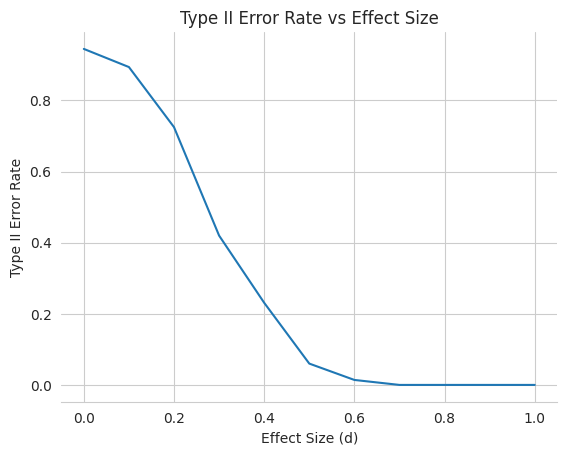

In [40]:
fig, ax = plt.subplots()

plt.plot(df['d'], df['type_ii_rates'])

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.title('Type II Error Rate vs Effect Size')
plt.ylabel('Type II Error Rate')
plt.xlabel('Effect Size (d)')
plt.show()

* __How does the Type II error rate change as the difference in means increases?__

* The plot shows that the Type II error rate ($\beta$) decreases as the effect size (mean difference) increases. 

* As $\beta$ decreases, the power of the test ($1 - \beta$) increases.

* If there is no difference between the means, then failing to reject the null hypothesis is correct and not a Type II error.

* When the difference between the means is small, it makes it more likely to fail to reject the null hypothesis. This increases the probability of a Type II error.

The _t_-test formula helps explain why this occurs:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}
         {s_{pooled}\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Where: 
* ${\bar{X}_1},\, \bar{X}_2 $ = sample means
  
* $n_1, \, n_2$ = sample sizes

* $s_{pooled}$ = pooled standard error

This YouTube, video [Independent Samples _t_-test](https://www.YouTube.com/watch?v=jyoO4i8yUag&t=396s), explains how a _t_-test is calculated.

This reference, [The Independent Samples t-test Formula](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Statistics%3A_Open_for_Everyone_%28Peter%29/08%3A_Independent_Samples_t-Tests/8.03%3A_The_Independent_Samples_t-Test_Formula) from Statistics LibreTexts simplifies this expression as:

$$t = \frac{difference\;in\;sample\;means}{pooled\;standard\;error}$$

This expression is similar to [Cohen's d](https://statisticsbyjim.com/basics/cohens-d/), which is a standardised effect size for measuring the difference between two group means. 
$$d = \frac{\bar{X}_1 - \bar{X}_2}{s_{pooled}}$$

The numerator is the difference in the sample means.

As the difference between the means, ${\bar{X}_1} - \bar{X}_2$ increases:
* The _t_-statistic will increase,
* Therefore, the _p_-value decreases,
* And it becomes more likely that _p_ <= $\alpha$  and the null hypothesis, _H<sub>0</sub>_ will be rejected.
* So Type II errors decrease.
* And power increases.

For more on the power of the test, this short [YouTube video](https://www.youtube.com/watch?v=K3V8fbcJJkw) has a simulation of the effect of increasing the difference in sample means and the impact of sample size on the power of the test. The video confirmed my findings that a large shift in the mean increases the power of the test. This problem did not explore the effect of increasing sample size, but, as explained in the video, increasing sample size increases the power of the test. 

***

## Problem 4: ANOVA

### __Brief__

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample _t_-tests: Samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.
   
Write a short note on why ANOVA is preferred over running several _t_-tests.

### __Background__

The one-way analysis of variance (ANOVA) is used to determine if there are significant differences between the means of three or more independent groups. 

ANOVA does not identify which groups are statistically different from each other - only that at least two groups are different. Post-hoc tests, such as Tukey's Honestly Significant Difference (HSD), are used to identify which group means differ. 

The ANOVA test assumes:
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal.

There are two types of ANOVA:
* [One-way ANOVA](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)
  
    Compares the means of three or more groups based on one categorical independent variable. [Statistics.laerd.com](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php) outlines a scenario in which one-way ANOVA is used. For instance, if a researcher wants to know if different pacing techniques impact how long a marathon takes. 

* [Two-way ANOVA](https://en.wikipedia.org/wiki/Two-way_analysis_of_variance)

    Examines how two categorical independent variables (each with two or more groups) affect one dependent variable, and whether the variables interact with each other. [Scribbr.com](https://www.scribbr.com/statistics/two-way-anova/) gives an example of researchers investigating which type of fertiliser and planting density maximise crop yield. 

ANOVA returns an F-statistic, from which a _p_-value is calculated. Historically, the _p_-values were obtained from F-distribution tables. 

The F-statistic measures the ratio of between-group variance to within-group variance:

$$F=\frac{MS_{between}}{MS_{within}}$$

Where: 
* $MS_{between}$: mean squares between groups.
* $MS_{within}$: mean squares within groups.

If all group means come from populations with the same true mean, the variance between group means should be similar to (or smaller than) the variance within groups. This [in-Depth Guide on ANOVA with examples on datacamp.com](https://www.datacamp.com/tutorial/anova-test) demonstrates how to calculate the F-statistic. 

A large F-statistic (or a _p_-value below the significance level) indicates that at least one of the group means is significantly different from the others.

### __Solution__

* __State the null hypothesis, alternative hypothesis and significance level.__

[Laerd.com](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php) states that the null hypothesis for a ``one-way ANOVA`` is:

__Null hypothesis:__ The samples in all groups are drawn from populations with the same mean values.

$$H_0: \mu_1 = \mu2 = \mu3 $$

__Alternative hypothesis:__ At least two group means are significantly different from each other.

The __significance level__, $\alpha$, for this problem:

$$\alpha = 0.05$$

In [41]:
# Significance level.
alpha = 0.05

* __Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.__

In [81]:
# First sample: mean 0, sd = 1.
sample_1 = np.random.normal(loc=0.0, scale=1.0, size=30)

# Second sample: mean 0.5, sd = 1.
sample_2 = np.random.normal(loc=0.5, scale=1.0, size=30)

# Third sample: mean 1.0, sd = 1.
sample_3 = np.random.normal(loc=1.0, scale=1.0, size=30)

* __Perform one-way ANOVA to test whether all three means are equal.__

A one-way ANOVA is appropriate for the three generated samples because the samples are independent, normally distributed and have equal standard deviations. 

``Scipy.stats.f_oneway(sample1, sample2,....)`` (see [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)) performs a one-way ANOVA to compare the means of two or more independent groups.

It returns:
* F-statistic
* _p_-value

In [82]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(sample_1, sample_2, sample_3)

# Show.
f_statistic, p_value

(np.float64(3.773201344448509), np.float64(0.026824372994798753))

In [83]:
# Determine whether to reject or fail to reject the null hypothesis.
hypothesis_test_decision(p_value, alpha)

'Reject the null hypothesis.'

* __Perform three independent two-sample _t_-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.__

In [84]:
# Create a list of samples.
samples = [sample_1, sample_2, sample_3]

In [85]:
# Loop through all unique pairs of samples.
for a in range(len(samples)):

    # Starting b at a+1 ensures each pair of samples is tested only once.
    for b in range(a + 1, len(samples)):

        # Perform an independent samples t-test between sample a and sample b.
        t_stat, p_value = stats.ttest_ind(samples[a], samples[b])

        # Determine whether to reject or fail to reject the null hypothesis.
        decision = hypothesis_test_decision(p_value, alpha)

        # Print the results. 
        print(f"Sample {a+1} vs Sample {b+1}: p = {p_value:.5f} → {decision}")

Sample 1 vs Sample 2: p = 0.19551 → Fail to reject the null hypothesis.
Sample 1 vs Sample 3: p = 0.00734 → Reject the null hypothesis.
Sample 2 vs Sample 3: p = 0.16208 → Fail to reject the null hypothesis.


* __Compare the conclusions.__

With ANOVA, _p_ = 0.027 is less than the significance level, so there is sufficient evidence to reject the null hypothesis - at least one group differs from the others. However, ANOVA doesn't tell us which group differs. 

If we consider the results of the _t_-tests independently, the p-value of 0.007 between Sample 1 and Sample 3 indicates that the difference in means between Sample 1 (mean = 0.0) and Sample 3 (mean = 1.0) is statistically significant. The difference in means between Sample 1 vs Sample 2 and Sample 2 vs Sample 3 is 0.5. This, combined with the small sample size, n = 30, makes it harder for the _t_-test to distinguish between the samples and the null hypothesis was not rejected for these pairs. It is not surprising that the independent _t_-tests cannot distinguish between Samples 1 and Sample 2 and Sample 2 and Sample 3. This aligns with what we observed in Problem 3 - the larger the difference in means, the more power the _t_-test has to detect it. 

It is worth noting that re-running this test with new samples can give different results. Sometimes all three pairwise comparisons reject the null hypothesis, other times only one rejects the null hypothesis. 

A post hoc test such as [Tukey’s HSD](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html) test is performed after ANOVA and will give a more accurate result than performing several _t_-tests.

In [86]:
# Tukey's HSD.
res = stats.tukey_hsd(sample_1, sample_2, sample_3)

# Show.
print(res)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.328     0.417    -0.945     0.289
 (0 - 2)     -0.710     0.020    -1.327    -0.093
 (1 - 0)      0.328     0.417    -0.289     0.945
 (1 - 2)     -0.382     0.307    -0.999     0.235
 (2 - 0)      0.710     0.020     0.093     1.327
 (2 - 1)      0.382     0.307    -0.235     0.999



Tukey's HSD confirms the finding that Samples 1 and Samples 3 are significantly different. 

* __Why is ANOVA preferred over running several t-tests?__

As the number of groups increase, the number of hypothesis tests that must be performed increases quadratically. This source from [Statistics LibreTexts](https://stats.libretexts.org/Courses/Luther_College/Psyc_350:Behavioral_Statistics_%28Toussaint%29/08:_Tests_of_Means/8.05:_Pairwise_Comparisons) includes a plot of the number of possible comparisons between pairs. If there are only two groups, then only one comparison can be made. If there are 12 groups, there are 66 possible comparisons.

[Laerd.com](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php) states that every time a _t_-test is conducted there is a chance of making a Type I error. With multiple comparisons, this error is compounded and the actual error rate is much higher than the significance level.

The Family-Wise error rate calculates the probability of making one or more false positives across the family of tests.

For multiple tests the [Family-Wise Error Rate (FWER)](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) is calculated by:
$$FWER = 1 - (1- \alpha)^m$$

Where:
* $m$: number of comparisons
* $\alpha$: significance level
  
For this problem, with 3 comparisons and $\alpha = 0.05$, the error rate for the three independent _t_-tests is 14.3%. This means there is a 14.3% chance of making at least one Type I error across all three tests - nearly triple the intended 5% rate. This is an unacceptably high error rate. ANOVA controls for these errors so that the Type I error remains at 5% (or the predefined significance level). 

## Conclusion

Each problem in this notebook focuses on different fundamental concepts in applied statistics.

__Problem 1: Lady Tasting Tea__

The Lady Tasting Tea experiment explored key concepts in hypothesis testing such as null and alternative hypothesis, significance levels and _p_-values. By simulating random selections, we estimated the probability of correctly identifying milk-first cups by chance and compared it to the pre-selected significance level, demonstrating how _p_-values guide decisions to reject or fail to reject the null hypothesis.

For the 12-cup Lady Tasting Tea experiment simulated, a _p_-value of 0.002 was calculated. This is below the significance level of 0.05 so there is sufficient evidence to reject the null hypothesis if the four milk first cups are chosen. 

__Problem 2: Normal Distribution__

Many statistical tests assume that the data is normally distributed. For this problem, samples were generated using NumPy from both a normal distribution and a standard normal distribution. The population and sample standard deviations were calculated, and the differences between them explained in terms of Bessel's correction, and sample size. Sample standard deviation serves an estimate of the population standard deviation.

The mean of the population standard deviation is smaller than the sample standard deviation. Increasing the sample size would result in the sample standard deviations converging on the population standard deviation. As the sample gets larger, the sample mean becomes closer to the population mean. This example demonstrates the importance of adequate sample size in statistical calculations. 

__Problem 3: _t_-tests__

Problem 3 explored independent _t_-tests for comparing the means of two groups. It examined how the size of the difference in means between the two groups affected the Type II error rate.

As the difference in means increased, the probability of failing to reject the null hypothesis decreased, reducing likelihood of Type II errors. The larger the difference in means between two groups makes it easier to detect true differences between them.

__Problem 4: ANOVA__

The means of three independent groups were compared using one-way ANOVA and multiple _t_-tests. 

ANOVA demonstrated that at least two groups differently significantly, while multiple _t_-tests highlighted the increased risk of Type I errors. ANOVA followed by a post hoc test, such as Tukey's HSD, is the preferred approach for testing multiple groups simultaneously. 

End
***